<h1>Chest X-Ray Images (Pneumonia)</h1>
<p>The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.</p>

<h2>Acknowledgements</h2>

Data: https://data.mendeley.com/datasets/rscbjbr9sj/2

License: CC BY 4.0

Citation: http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5

**importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
import zipfile

**Mouting the google drive to upload the dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/pneumonia.zip')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
os.listdir('/tmp/chest_xray/chest_xray')

['train', '.DS_Store', 'val', 'test']

**Setting up the data directories**

In [5]:
data_dir = '/tmp/chest_xray'
train_path = '/tmp/chest_xray/train/'
test_path = '/tmp/chest_xray/test/'
val_path = '/tmp/chest_xray/val/'

In [6]:
print("The labels in this dataset are: ", os.listdir(train_path))

The labels in this dataset are:  ['NORMAL', 'PNEUMONIA']


Filename of the first image in NORMAL label:  IM-0555-0001-0001.jpeg


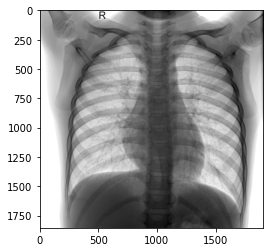

In [7]:
print("Filename of the first image in NORMAL label: ", os.listdir(train_path + 'NORMAL/')[0])
normal_img = train_path + 'NORMAL/IM-0555-0001-0001.jpeg'
plt.imshow(imread(normal_img), cmap='binary')

**VISUALISATION OF NORMAL XRAY**

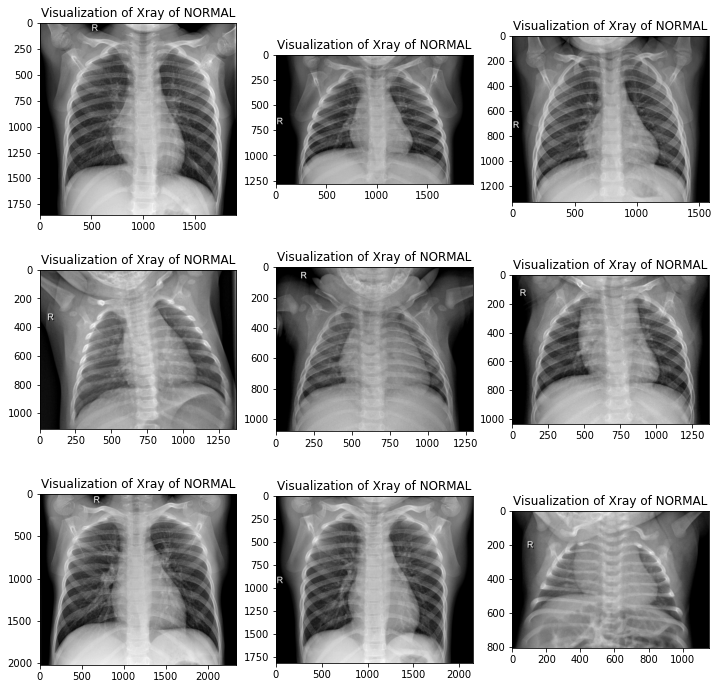

In [8]:
plt.figure(figsize = (12,12))
for i in range(9):
    plt.subplot(3,3, i+1)
    img = plt.imread(os.path.join(train_path + 'NORMAL/', os.listdir(train_path + 'NORMAL/')[i]))
    plt.imshow(img, cmap='gray')
    plt.title("Visualization of Xray of NORMAL")
plt.show()

**VISUALISATION OF PNEUMONIA XRAY**

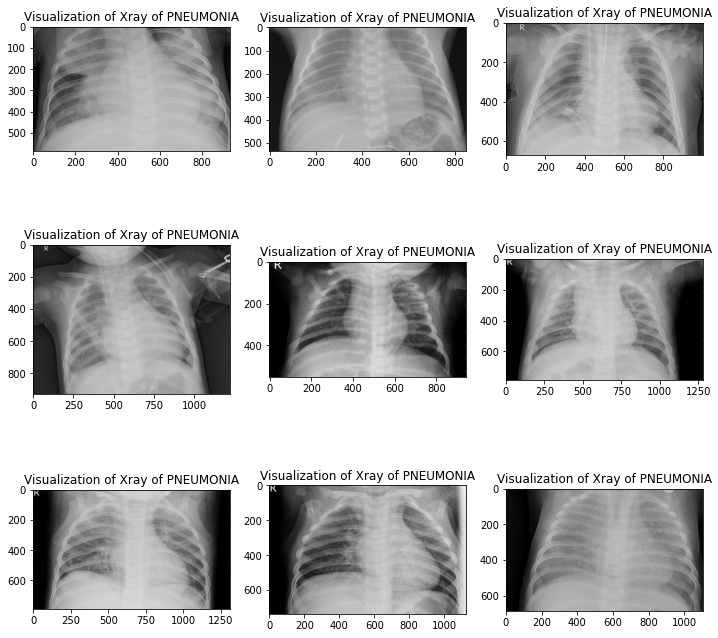

In [9]:
plt.figure(figsize = (12,12))
for i in range(9):
    plt.subplot(3,3, i+1)
    img = plt.imread(os.path.join(train_path + 'PNEUMONIA/', os.listdir(train_path + 'PNEUMONIA/')[i]))
    plt.imshow(img, cmap='gray')
    plt.title("Visualization of Xray of PNEUMONIA")
plt.show()

In [10]:
print("Number of training NORMAL XRAY images: ", len(os.listdir(train_path+'NORMAL/')))
print("Number of test NORMAL XRAY images: ", len(os.listdir(test_path+'NORMAL/')))
print("Number of validation NORMAL XRAY images: ", len(os.listdir(val_path+'NORMAL/')))

Number of training NORMAL XRAY images:  1341
Number of test NORMAL XRAY images:  234
Number of validation NORMAL XRAY images:  8


In [11]:
print("Number of training PNEUMONIA XRAY images: ", len(os.listdir(train_path+'PNEUMONIA/')))
print("Number of test PNEUMONIA XRAY images: ", len(os.listdir(test_path+'PNEUMONIA/')))
print("Number of validation PNEUMONIA XRAY images: ", len(os.listdir(val_path+'PNEUMONIA/')))

Number of training PNEUMONIA XRAY images:  3875
Number of test PNEUMONIA XRAY images:  390
Number of validation PNEUMONIA XRAY images:  8


In [12]:
print("Total number of NORMAL XRAY images: ", 1341+234+8)
print("Total number of PNEUMONIA XRAY images: ", 3875+390+8)
print("Total number of images in the dataset: ", 1583+4273)

Total number of NORMAL XRAY images:  1583
Total number of PNEUMONIA XRAY images:  4273
Total number of images in the dataset:  5856


* From this we can clearly see that, the data is imbalanced.
* There are only 1583 NORMAL XRAY images and there are 4273 PNEUMONIA XRAY images.
* So we need to augument the data

**Resizing the shapes**

In [13]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'PNEUMONIA'):
  img = imread(test_path+'PNEUMONIA/'+image_filename)
  d1,d2 = img.shape
  dim1.append(d1)   # width
  dim2.append(d2)   # height

In [14]:
print("Width of first few images: ", dim1[:5])
print("Height of first few images: ", dim2[:5])

Width of first few images:  [560, 1208, 528, 744, 616]
Height of first few images:  [872, 1320, 936, 1336, 960]


In [15]:
# taking average of the dimensions

print("The mean of the width dimension: ", np.mean(dim1))
print("The mean of the height dimension: ", np.mean(dim2))

The mean of the width dimension:  765.2897435897436
The mean of the height dimension:  1140.823076923077


In [16]:
# setting image shape 

image_shape = (765,1140,1)

**Data preprocessing**

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
image_gen = ImageDataGenerator(rotation_range=30,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               shear_range=0.1,
                               zoom_range=0.2,
                               rescale=1/255,
                               horizontal_flip=True,
                               fill_mode='nearest')

**Creating the model**

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(filters=128 , kernel_size=(3,3) ,input_shape=image_shape, padding = 'valid' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(filters=256 , kernel_size=(3,3) , input_shape=image_shape, padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2) , strides = 2 , padding = 'same'))

model.add(Flatten())

model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))

model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 765, 1140, 32)     320       
                                                                 
 batch_normalization (BatchN  (None, 765, 1140, 32)    128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 383, 570, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 383, 570, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 383, 570, 64)     256       
 hNormalization)                                                 
                                                        

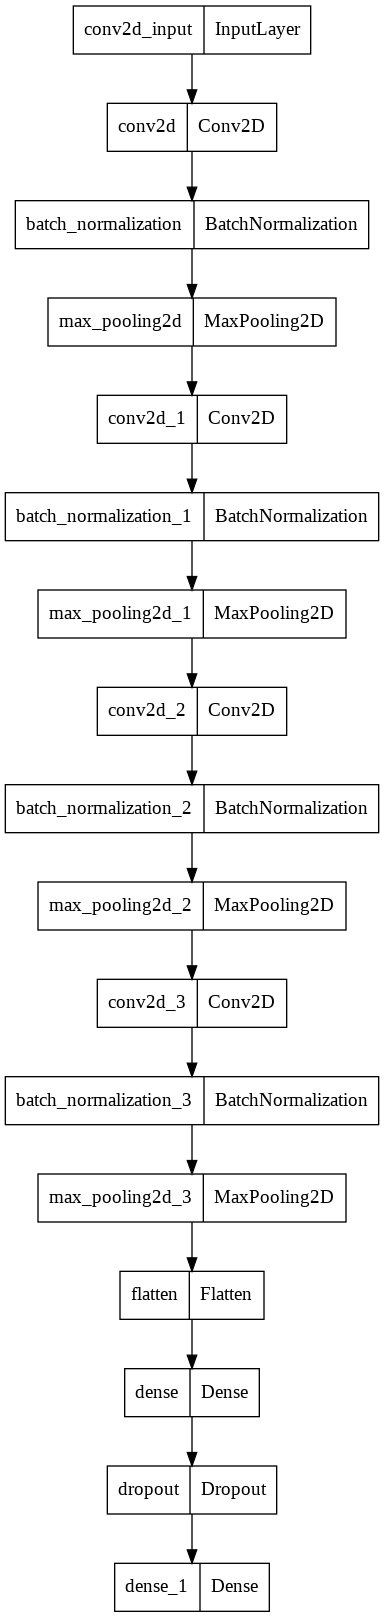

In [21]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='Pneumonia.png')

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [26]:
train_image_gen = image_gen.flow_from_directory(train_path, 
                                                target_size=(765,1140),
                                                color_mode='grayscale',
                                                batch_size=16,
                                                class_mode='binary')

test_image_gen = image_gen.flow_from_directory(test_path, 
                                                target_size=(765,1140),
                                                color_mode='grayscale',
                                                batch_size=16,
                                                class_mode='binary',
                                                shuffle=False)
val_image_gen = image_gen.flow_from_directory(val_path, 
                                                target_size=(765,1140),
                                                color_mode='grayscale',
                                                batch_size=16,
                                                class_mode='binary',
                                                shuffle=False)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [24]:
train_image_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [27]:
result = model.fit(train_image_gen, epochs=10, validation_data=test_image_gen, callbacks=[early_stop])

Epoch 1/10
326/326 [==============================] - 454s 1s/step - loss: 7.7325 - accuracy: 0.7736 - val_loss: 62.5207 - val_accuracy: 0.6250
Epoch 2/10
326/326 [==============================] - 443s 1s/step - loss: 0.5748 - accuracy: 0.8347 - val_loss: 1.5477 - val_accuracy: 0.7260
Epoch 3/10
326/326 [==============================] - 439s 1s/step - loss: 0.4196 - accuracy: 0.8472 - val_loss: 1.4564 - val_accuracy: 0.6667
Epoch 4/10
326/326 [==============================] - 438s 1s/step - loss: 0.4667 - accuracy: 0.8662 - val_loss: 77.9004 - val_accuracy: 0.6250
Epoch 5/10
326/326 [==============================] - 437s 1s/step - loss: 0.4617 - accuracy: 0.8740 - val_loss: 559.9000 - val_accuracy: 0.6250


In [28]:
pred = model.predict(test_image_gen)

In [29]:
predictions = pred > 0.5

In [30]:
test_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_image_gen.classes, pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       234
           1       0.62      1.00      0.77       390

    accuracy                           0.62       624
   macro avg       0.31      0.50      0.38       624
weighted avg       0.39      0.62      0.48       624

